# Modeling

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble  import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
feature_data_folder = './feature_data/'

In [3]:
#load all features & labels
#hog features
train_hog = np.load(feature_data_folder + 'hog+/train_hog.npy')
test_hog = np.load(feature_data_folder + 'hog+/test_hog.npy')
val_hog = np.load(feature_data_folder + 'hog+/val_hog.npy')

#resnet feature maps
train_resnet = np.load(feature_data_folder + 'resnet50/train-fmaps.npy')
test_resnet = np.load(feature_data_folder + 'resnet50/test-fmaps.npy')
val_resnet = np.load(feature_data_folder + 'resnet50/val-fmaps.npy')

#glcm
train_glcm = np.load(feature_data_folder + 'glcm_scaled/train_glcm.npy')
val_glcm = np.load(feature_data_folder + 'glcm_scaled/val_glcm.npy')
test_glcm = np.load(feature_data_folder + 'glcm_scaled/val_glcm.npy')

#load labels
train_labels = np.load(feature_data_folder + 'resnet18/train-labels.npy')
test_labels = np.load(feature_data_folder + 'resnet18/test-labels.npy')
val_labels = np.load(feature_data_folder + 'resnet18/val-labels.npy')

## Hog PCA

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_hog)

In [23]:
pca = PCA()
pca.fit(X_scaled)

PCA()

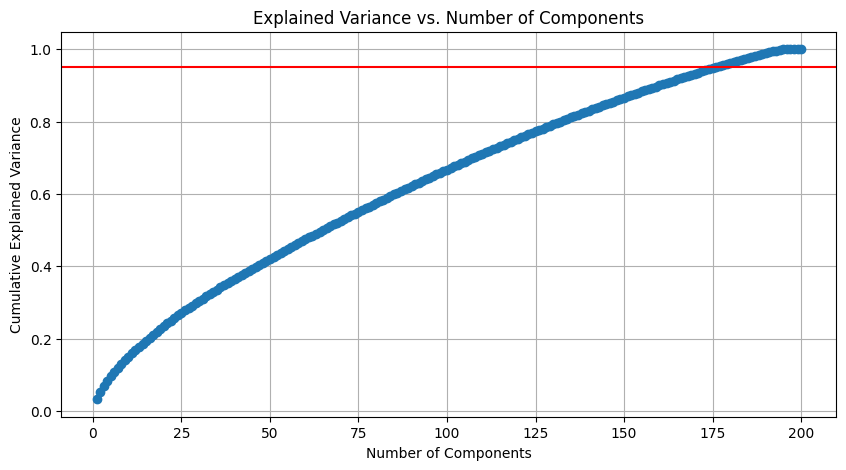

In [24]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## GLCM PCA

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_glcm)

In [26]:
pca = PCA()
pca.fit(X_scaled)

PCA()

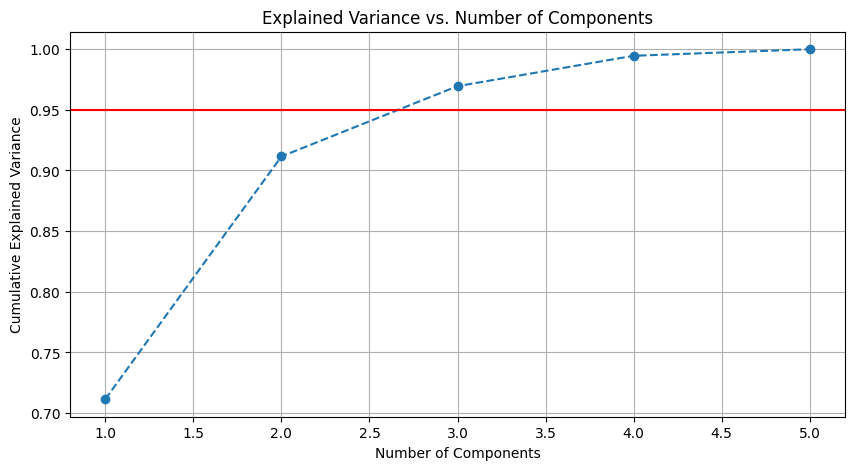

In [27]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

## Resnet PCA

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_resnet)

In [29]:
pca = PCA()
pca.fit(X_scaled)

PCA()

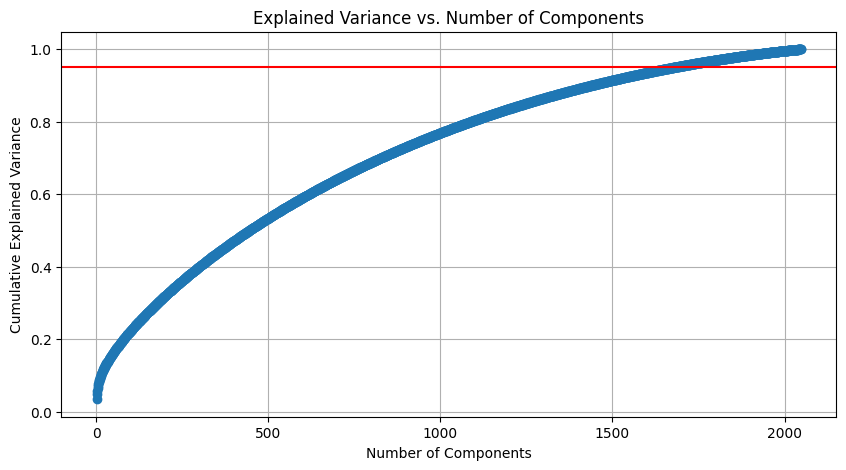

In [30]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [31]:
print(train_resnet.shape)
print(train_hog.shape)
print(train_glcm.shape)

(8252, 2048)
(8252, 200)
(8252, 5)


## Data Prep

In [32]:
resnet_scaler = StandardScaler()
hog_scaler = StandardScaler()
glcm_scaler = StandardScaler()

In [33]:
train_resnet_scaled = resnet_scaler.fit_transform(train_resnet)
train_hog_scaled = hog_scaler.fit_transform(train_hog)
train_glcm_scaled = glcm_scaler.fit_transform(train_glcm)

In [35]:
val_resnet_scaled = resnet_scaler.fit_transform(val_resnet)
val_hog_scaled = hog_scaler.fit_transform(val_hog)
val_glcm_scaled = glcm_scaler.fit_transform(val_glcm)

## Simple Classification

In [63]:
X_train = np.hstack([train_hog_scaled, train_glcm_scaled])
X_val = np.hstack([val_hog_scaled, val_glcm_scaled])

y_train = train_labels
y_val = val_labels

In [41]:
clf_logistic = LogisticRegression(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

0.6019146873485216
0.462922966162707


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
clf_sgd = SGDClassifier(max_iter=1000, class_weight='balanced').fit(X_train, y_train)
print(clf_sgd.score(X_train, y_train))
print(clf_sgd.score(X_val, y_val))

0.5638633058652448
0.46220302375809935


In [42]:
clf_svm_lin = svm.LinearSVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm_lin.score(X_train, y_train))
print(clf_svm_lin.score(X_val, y_val))

0.6266359670382937
0.509719222462203


In [43]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.840523509452254
0.5291576673866091


In [47]:
clf_hist = HistGradientBoostingClassifier(class_weight='balanced').fit(X_train, y_train)
print(clf_hist.score(X_train, y_train))
print(clf_hist.score(X_val, y_val))

0.9996364517692681
0.5953923686105111


## Complex Classification

In [48]:
X_train = train_resnet_scaled
X_val = val_resnet_scaled

y_train = train_labels
y_val = val_labels

In [49]:
clf_logistic = LogisticRegression(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

1.0
0.7973362131029518


In [ ]:
clf_sgd = SGDClassifier(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_sgd.score(X_train, y_train))
print(clf_sgd.score(X_val, y_val))

In [50]:
clf_svm_lin = svm.LinearSVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm_lin.score(X_train, y_train))
print(clf_svm_lin.score(X_val, y_val))

1.0
0.7465802735781137


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [51]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9907901114881241
0.8207343412526998


In [52]:
clf_hist = HistGradientBoostingClassifier(class_weight='balanced').fit(X_train, y_train)
print(clf_hist.score(X_train, y_train))
print(clf_hist.score(X_val, y_val))

1.0
0.7562994960403168


## All Feature

In [86]:
X_train = np.hstack([train_hog_scaled, train_glcm_scaled, train_resnet_scaled])
X_val = np.hstack([val_hog_scaled, val_glcm_scaled, val_resnet_scaled])

y_train = train_labels
y_val = val_labels

In [55]:
clf_logistic = LogisticRegression(max_iter=50, class_weight='balanced').fit(X_train, y_train)
print(clf_logistic.score(X_train, y_train))
print(clf_logistic.score(X_val, y_val))

1.0
0.8095752339812815


In [62]:
clf_sgd = SGDClassifier(max_iter=40, class_weight='balanced').fit(X_train, y_train)
print(clf_sgd.score(X_train, y_train))
print(clf_sgd.score(X_val, y_val))

0.9984246243334949
0.7804175665946724


c:\Users\micha\miniconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [56]:
clf_svm = svm.SVC(class_weight='balanced').fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9935773145904023
0.8232541396688265


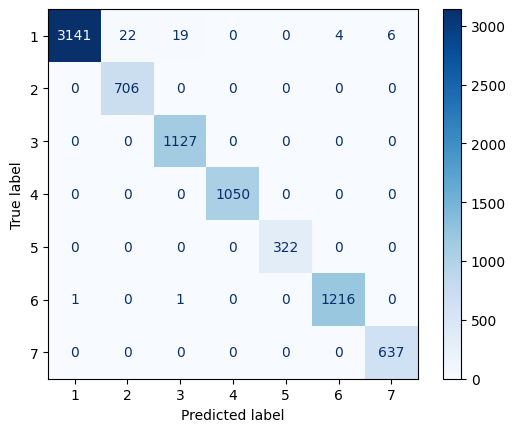

In [59]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

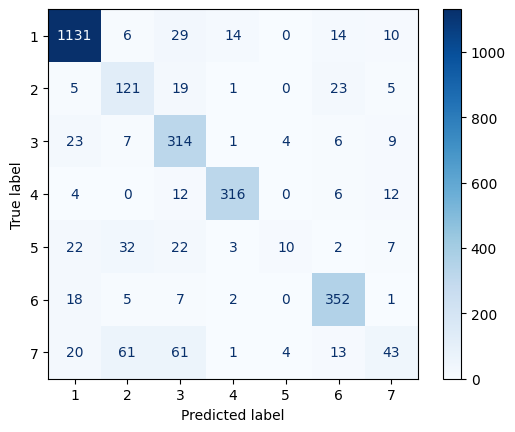

In [60]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

## Grid Search

In [78]:
X_combined = np.concatenate([X_train, X_val], axis=0)
y_combined = np.concatenate([y_train, y_val], axis=0)
test_fold = np.concatenate([-1 * np.ones(len(X_train), dtype=int), np.zeros(len(X_val), dtype=int)])

In [82]:
param_grid = [
  {'C': [5, 10, 15], 'gamma': [0.0001, 0.0005], 'kernel': ['rbf']},
]

ps = PredefinedSplit(test_fold)

clf = GridSearchCV(svm.SVC(class_weight='balanced'),
    param_grid=param_grid,
    n_jobs=2,
    pre_dispatch="n_jobs",
    cv=ps).fit(X_combined, y_combined)

In [83]:
clf.best_params_

{'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}

In [85]:
clf.best_score_

0.8225341972642188

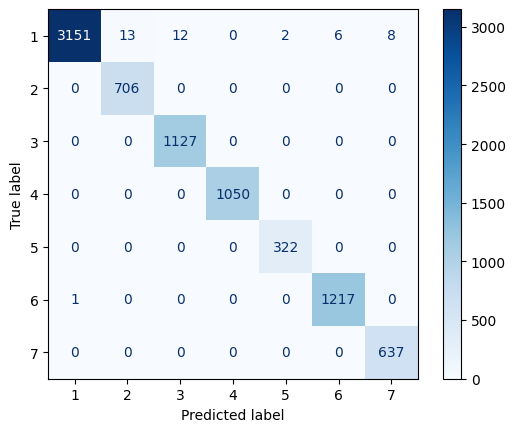

In [87]:
cm = confusion_matrix(y_train, clf.best_estimator_.predict(X_train), labels = clf.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

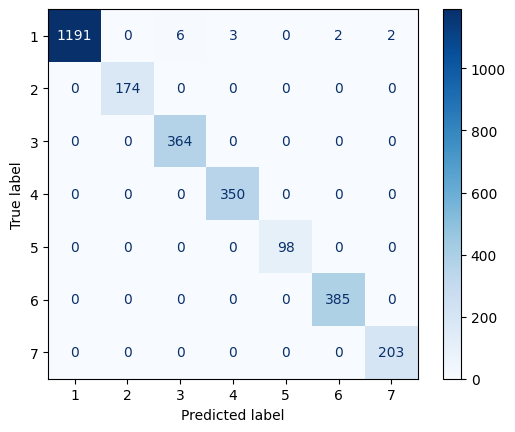

In [88]:
cm = confusion_matrix(y_val, clf.best_estimator_.predict(X_val), labels = clf.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

In [90]:
clf.best_estimator_

SVC(C=5, class_weight='balanced', gamma=0.0001)

In [91]:
clf_svm = svm.SVC(class_weight='balanced', C=5, gamma=0.0001).fit(X_train, y_train)
print(clf_svm.score(X_train, y_train))
print(clf_svm.score(X_val, y_val))

0.9964857004362578
0.8225341972642188


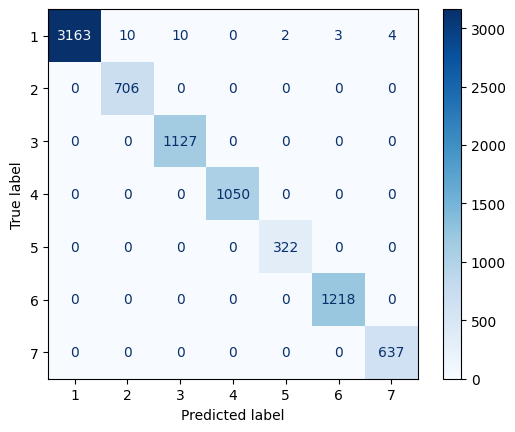

In [92]:
cm = confusion_matrix(y_train, clf_svm.predict(X_train), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()

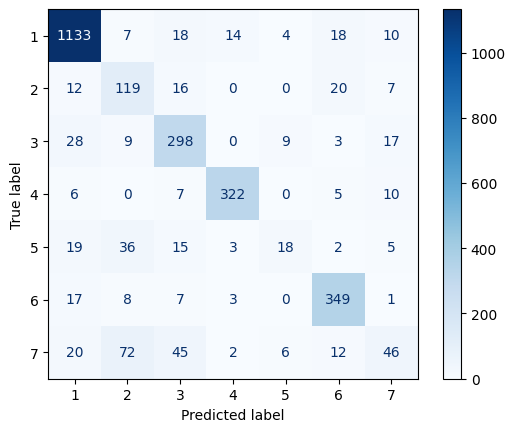

In [93]:
cm = confusion_matrix(y_val, clf_svm.predict(X_val), labels = clf_svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = clf_svm.classes_)
disp.plot(cmap='Blues')
plt.show()